# Quality Assessment
Now it's your turn. Follow the steps on the platform and use what you've learnt to see how reliable the data is.

In [1]:
import pandas as pd

Load our cleaned DataFrames

In [2]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

In [3]:
orders_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226904 entries, 0 to 226903
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226904 non-null  int64  
 1   created_date  226904 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226904 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


## 1.&nbsp; Define Pandas display format

In [4]:
# your code here
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)

In [5]:
orders_cl

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled
...,...,...,...,...
226899,527397,2018-03-14 13:56:38,42.99,Place Order
226900,527398,2018-03-14 13:57:25,42.99,Shopping Basket
226901,527399,2018-03-14 13:57:34,141.58,Shopping Basket
226902,527400,2018-03-14 13:57:41,19.98,Shopping Basket


## 2.&nbsp; Exclude unwanted orders

In [6]:
# your code here
orders_cl = orders_cl.loc[orders_cl['state'] == 'Completed']
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [7]:
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [8]:
valid_order_id = orderlines_cl['id_order'].unique()
valid_order_id.shape

(170213,)

In [9]:
orders_cl = orders_cl[orders_cl['order_id'].isin(valid_order_id)]
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [10]:
valid_id_order = orders_cl['order_id'].unique()
valid_id_order.shape

(43064,)

In [11]:
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
216245,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
216246,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
216247,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
216248,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [12]:
orderlines_cl = orderlines_cl[orderlines_cl['id_order'].isin(valid_id_order)]
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [13]:
orders_cl['order_id'].nunique(),orderlines_cl['id_order'].nunique()

(43064, 43064)

## 3.&nbsp; Exclude orders with unknown products


In [14]:
products_cl.sample(10)

,sku,name,desc,price,in_stock,type
793,STA0016,Startech Mini DisplayPort to DisplayPort Cable...,Adapdator Cable Mini Display Port Male to Disp...,12.99,0,1325
8741,IKM0064,IK Multimedia Grip iKlip Pro Camera Support,Multipurpose support (tripod empuÌ ± Adura sel...,59.99,1,11905404
3531,DLK0117,D-Link DWA-172 USB Adapter AC600 Wi-Fi Dual-Band,AC adapter antenna technology and double bandw...,24.99,0,1334
8461,PAC2244,DS418play Synology NAS Server | 2GB RAM | 24TB...,4-bay NAS server to accommodate 4K Ultra HD files,1514.99,0,12175397
4918,LAC0192,LaCie d2 Quadra Hard Drive USB 3.0 External eS...,5TB external hard drive with USB 3.0 eSATA and...,289.00,0,11935397
5400,APP1787,Apple Correa 38mm Sport Gray Cement,Durable and flexible strap sports with clip cl...,59.00,0,2449
9428,ADN0033-A,Adonith Switch Pointer + Pen Silver,Reconditioned pointer to write on touch screen...,34.99,0,1229
663,PAC0374,OWC Mercury Elite Pro Dual Thunderbolt 4TB +,RAID outer box 35 inch SATA connection Thunder...,474.97,0,11935397
3176,APP1101-A,Open - Apple (OEM) Charger 45W MagSafe MacBook...,Charger MacBook Air MagSafe 45 W (MC747Z / A).,89.00,0,1298
8881,WAC0169-A,Open - Wacom Intuos Creative Comic Pen & Touch...,graphics tablet with pen and digital toolbox f...,99.99,0,1405


In [15]:
products_cl['name'].isna().sum()

np.int64(0)

In [16]:
# your code here
valid_products = products_cl['sku'].unique()
valid_products.shape

(9992,)

In [17]:
products_notin_orderlines = orderlines_cl[~orderlines_cl['sku'].isin(valid_products)]
orderid_with_unknownProducts = products_notin_orderlines['id_order'].unique()
orderid_with_unknownProducts.shape

(1363,)

In [18]:
orderlines_cl = orderlines_cl[~orderlines_cl['id_order'].isin(orderid_with_unknownProducts)]
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50
...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35


In [19]:
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [20]:
orders_cl = orders_cl[~orders_cl['order_id'].isin(orderid_with_unknownProducts)]
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [21]:
orders_cl['order_id'].nunique(),orderlines_cl['id_order'].nunique()

(41701, 41701)

## 4.&nbsp; Explore the revenue from different tables

#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [22]:
# your code here
orderlines_cl['unit_price_total'] = orderlines_cl['unit_price'] * orderlines_cl['product_quantity']
orderlines_cl

/tmp/ipython-input-2393931677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orderlines_cl['unit_price_total'] = orderlines_cl['unit_price'] * orderlines_cl['product_quantity']


,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
215889,1649474,525664,0,1,TUC0207,16.52,2018-03-14 11:45:05,16.52
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


#### Step 2:
Group by `id_order`, summarising by the sum of `unit_price_total`

In [23]:
# your code here
orderlines_cl.groupby('id_order')['unit_price_total'].sum().nsmallest(10)

,unit_price_total
id_order,
495515,2.49
495734,2.49
499058,2.49
443045,2.54
446256,2.54
449852,2.54
334385,2.82
391374,2.84
395475,2.99


In [24]:
products_cl

,sku,name,desc,price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364
...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392


### What is the average difference between `total_paid` and `unit_price_total`?

In [25]:
# your code here
orderlines_agg = orderlines_cl.groupby('id_order')['unit_price_total'].sum().reset_index()

orders_with_lines = orders_cl.merge(orderlines_agg, left_on='order_id', right_on='id_order')
orders_with_lines


,order_id,created_date,total_paid,state,id_order,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98
...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97


In [26]:
orders_with_lines['diff'] = orders_with_lines['total_paid'] - orders_with_lines['unit_price_total']

avg_diff = orders_with_lines['diff'].mean()
print("Average difference:", avg_diff)

Average difference: 4.474808277978945


In [27]:
avg_difference = orders_cl['total_paid'].mean() - orderlines_cl['unit_price_total'].mean()
avg_difference

np.float64(48.89403250803733)

### What is the distribution of these differences?

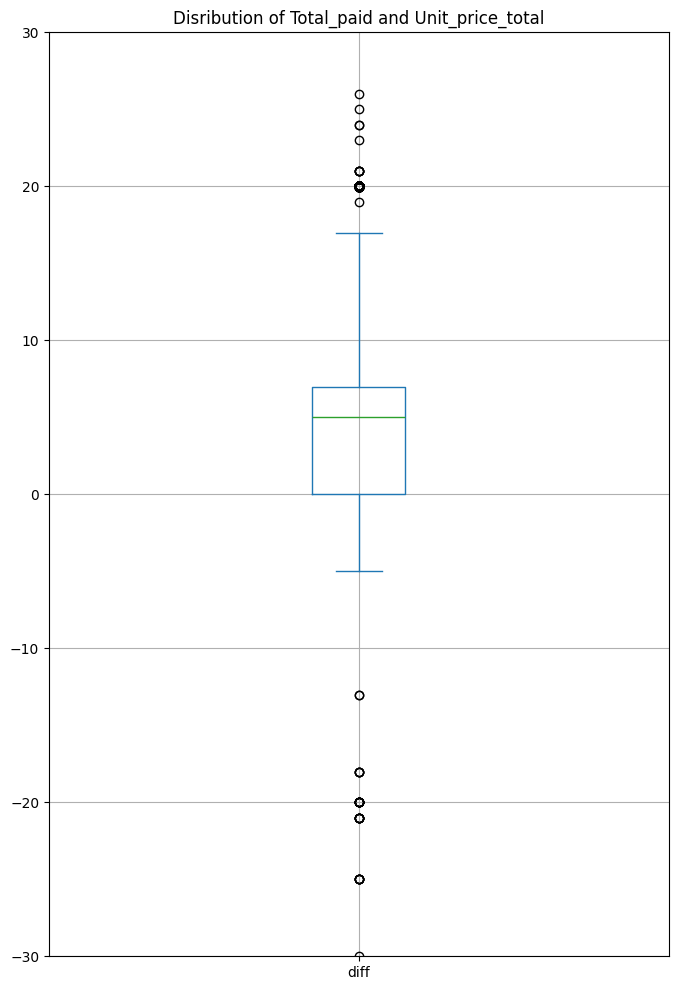

In [28]:
# your code here
orders_with_lines[['diff']].plot(kind='box',ylim=(-30,+30), figsize=(8,12), title='Disribution of Total_paid and Unit_price_total', grid=True);

In [29]:
orders_with_lines['diff'].describe()

,diff
count,41701.00
mean,4.47
std,26.05
min,-165.00
25%,0.00
50%,4.99
75%,6.99
max,3984.99


# Removing outliers

Q1 = 0.0
Q3 = 6.99
IQR = Q3 - Q1
    =6.99
To find ouliers
(Q1 - 1.5 * IQR)
(Q3 + 1.5 * IQR)

In [30]:
orders_with_lines = orders_with_lines[(orders_with_lines['diff'] >= (0.0 - 1.5 * 6.99)) & (orders_with_lines['diff'] <= (6.99 + 1.5 * 6.99))]
order_id_after_outliers = orders_with_lines['id_order'].unique()

In [31]:
orders_cl = orders_cl[orders_cl['order_id'].isin(order_id_after_outliers)]
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [32]:
orderlines_cl =orderlines_cl[orderlines_cl['id_order'].isin(order_id_after_outliers)]
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
21,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49
...,...,...,...,...,...,...,...,...
215877,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [33]:
orders_cl['order_id'].nunique(),orderlines_cl['id_order'].nunique()

(40985, 40985)

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

Discounts
Shipping cost
Taxes

### If there are differences that you can’t explain: what should you do with these orders?

In [34]:
# your code here


## 5.&nbsp; Become confident about your dataset

In [35]:
orderlines_product = orderlines_cl.merge(products_cl[['sku','price']], on='sku')
orderlines_product

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,price
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99
...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99,25.00
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00


In [36]:
orderlines_product['discount'] = (orderlines_product['price'] - orderlines_product['unit_price'])
orderlines_product

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,price,discount
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,60.99,13.50
1,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99,22.95,3.96
2,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19,89.00,16.81
3,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90,76.99,16.09
4,1119145,299561,0,1,PEB0015,142.49,2017-01-01 02:38:50,142.49,299.99,157.50
...,...,...,...,...,...,...,...,...,...,...
53226,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99,25.00,15.01
53227,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98,25.00,15.01
53228,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98,25.00,15.01
53229,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97,25.00,15.01


In [37]:
orderlines_product.sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,price,discount
18552,1307602,384464,0,1,MOS0139,36.99,2017-07-31 12:56:04,36.99,45.00,8.01
25492,1379685,413341,0,1,APP0703,69.99,2017-10-16 22:23:26,69.99,89.00,19.01
32326,1438731,439863,0,1,ZAG0030,21.24,2017-11-24 15:57:13,21.24,79.99,58.75
27471,1394502,420469,0,1,CRU0053-2,368.99,2017-10-31 17:46:19,368.99,423.98,54.99
2047,1139617,306691,0,1,APP1666,41.99,2017-01-10 18:37:23,41.99,45.00,3.01
50677,1622395,515360,0,1,PLA0029,94.99,2018-02-21 12:14:29,94.99,129.99,35.00
42461,1532296,479546,0,1,AP20424,49.00,2018-01-02 12:52:28,49.00,59.00,10.00
32373,1439116,440039,0,1,LIF0119,56.94,2017-11-24 16:33:44,56.94,89.99,33.05
34943,1458669,448514,0,2,CRU0021,67.99,2017-11-27 15:25:00,135.98,79.99,12.00
22607,1355509,400845,0,1,XDO0015,19.99,2017-09-18 22:28:34,19.99,24.99,5.00


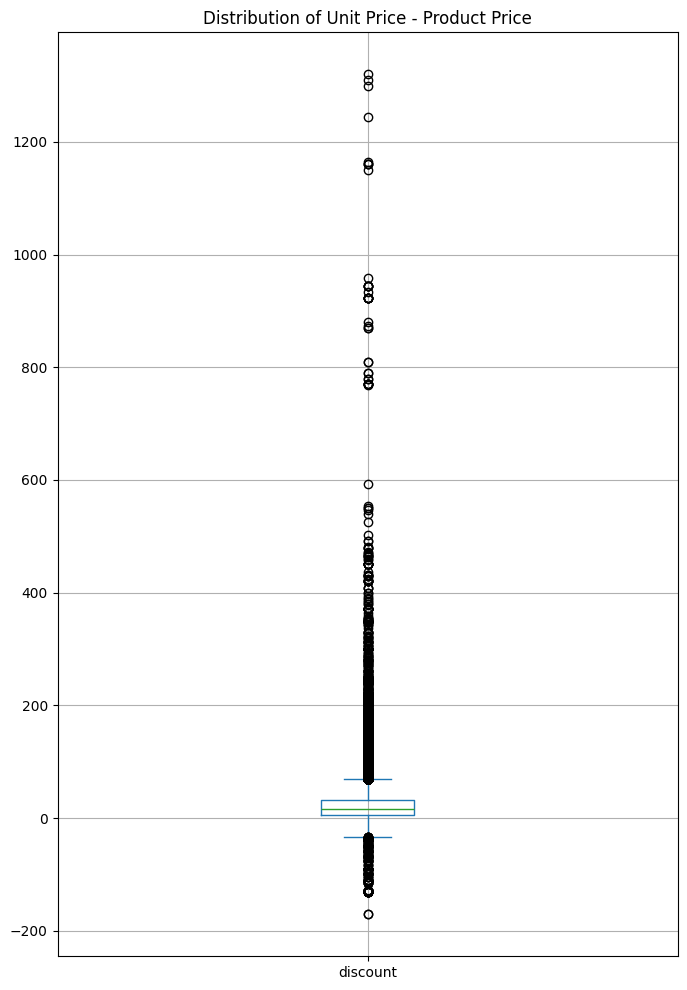

In [38]:
orderlines_product['discount'].plot(kind='box', figsize=(8,12), title='Distribution of Unit Price - Product Price', grid=True);

In [39]:
orderlines_product['discount'].describe()

,discount
count,53231.00
mean,26.12
std,45.55
min,-170.99
25%,5.25
50%,15.00
75%,31.00
max,1320.00


Q1 = 5.25
Q3 = 31.00
IQR  =25.75

In [40]:
orderlines_product = orderlines_product[(orderlines_product['discount'] >= (5.25 - 1.5 * 25.75)) & (orderlines_product['discount'] <= (31.00 + 1.5 * 25.75))]
orderlines_product_outliers = orderlines_product['id_order'].unique()

In [41]:
orderlines_product['discount'].describe()

,discount
count,48795.00
mean,17.87
std,16.98
min,-33.00
25%,5.00
50%,13.20
75%,25.00
max,69.46


In [42]:
orderlines_cl = orderlines_cl[orderlines_cl['id_order'].isin(orderlines_product_outliers)]
orderlines_cl

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
6,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49
7,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34,18.99
8,1119120,295347,0,1,APP0700,72.19,2017-01-01 01:54:11,72.19
15,1119134,299556,0,1,CRU0039-A,60.90,2017-01-01 02:20:14,60.90
23,1119154,299563,0,1,BEA0065,256.49,2017-01-01 02:42:05,256.49
...,...,...,...,...,...,...,...,...
215877,1649447,527035,0,1,APP0698,9.99,2018-03-14 11:42:41,9.99
215906,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
215911,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
215932,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


In [43]:
orders_cl = orders_cl[orders_cl['order_id'].isin(orderlines_product_outliers)]
orders_cl

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [44]:
orders_cl['order_id'].nunique(),orderlines_cl['id_order'].nunique()

(37404, 37404)

In [45]:
orderlines_product[orderlines_product['discount'] > 0].sample(10)

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,price,discount
18514,1307432,384400,0,1,SAM0074,153.99,2017-07-31 11:30:31,153.99,179.99,26.00
39627,1510624,469384,0,1,PAC2477,19.99,2017-12-22 10:03:34,19.99,59.98,39.99
9255,1228496,346398,0,1,SAN0134,55.99,2017-04-15 22:12:34,55.99,69.99,14.00
3222,1148173,310404,0,1,TOS0022,103.99,2017-01-16 13:17:23,103.99,139.95,35.96
28739,1405095,425653,0,1,MUV0176,20.69,2017-11-12 08:20:14,20.69,24.95,4.26
25854,1382683,414795,0,1,ZAG0030,19.99,2017-10-20 08:50:20,19.99,79.99,60.00
42331,1531605,424094,0,1,SNS0020,170.05,2018-01-02 10:02:33,170.05,179.00,8.95
3133,1147654,310201,0,1,IFX0034,19.99,2017-01-16 09:10:30,19.99,24.95,4.96
24204,1368942,408056,0,1,CYB0008,175.74,2017-10-03 18:25:01,175.74,209.00,33.26
51796,1632561,519915,0,1,MAC0144,24.99,2018-03-02 10:38:02,24.99,39.95,14.96


In [46]:
top_products = orderlines_product.groupby('sku').agg({
    'unit_price_total': 'sum',
    'id_order': 'count'
}).sort_values(by='unit_price_total', ascending=False).head(10)

Let's hear your thoughts about what you discovered.

In [47]:
# your thoughts & code here
orders_cl.to_csv('orders_qu.csv', index=False)
orderlines_cl.to_csv('orderlines_qu.csv', index=False)
products_cl.to_csv('products_qu.csv', index=False)

Do not forget to download your quality controlled DataFrames

In [48]:
from google.colab import files

files.download("orders_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
files.download("orderlines_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
files.download('products_qu.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>